# Introduction

The dataset utilized is the Family Income and Expenditure Survey 2012 Vol 1.

# Dataset

The Family Income and Expenditure Survey (FIES) 2012 is a national survey conducted by the Philippine Statistics Authority (PSA) to gather comprehensive data on family income and spending patterns across households in the Philippines. The dataset provides insights into income distribution, expenditure habits, and economic well-being, helping policymakers, researchers, and analysts assess poverty levels, economic growth, and financial behavior among Filipino households.

# Python Libaries and Modules

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Cleaning

The data was preprocessed and cleaned through these methods in order:

**1.) Standardizing Column Names**
- Column names were stripped of whitespace, converted to uppercase, and spaces were replaced with underscores to ensure consistency and avoid potential errors when referencing column names in code.

**2.) Handling Missing Values**
- Columns with more than 50% missing values were dropped.
For numerical columns, missing values were filled with the median of the respective column.
For categorical columns, missing values were filled with the mode (most frequent value).
- Dropping columns with excessive missing values prevents misleading analysis.
Using the median for numerical data avoids the influence of outliers.
Using the mode for categorical data preserves the most common category.
- Asset ownership features that did not have any input were assumed to have a value of 0 (meaning they do not own that item).

**3.) Removing Duplicates**
- Duplicate rows were removed as they could distort results and introduce bias.

**4.) Converting Data Types**
- Categorical columns (e.g., region, employment status, household type) were converted to category type.
Income and expenditure columns were converted to float.
- Converting numerical columns to float ensures compatibility with mathematical operations whilst categorical columns were converted to category type for easier referencing.

**5.) Handling Outliers**
- The Interquartile Range (IQR) method was used to cap extreme values:
Values below Q1 - 1.5 * IQR were replaced with the lower bound.
Values above Q3 + 1.5 * IQR were replaced with the upper bound.
- Outliers can distort statistical analysis and machine learning models.
The IQR method retains the distribution's general shape while reducing the influence of extreme values.

# Exploratory Data Analysis



Sanity check if there are missing values left in the cleaned dataset file

In [30]:
incexp_df = pd.read_csv("FIES_2012_Cleaned.csv")

missing_values = incexp_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


## Display Dataset/Table Information
In order to familiarize ourselves with out dataset, we first display the info of our dataset using the `.info()` function. Here we can see the number of rows and columns and the variable type of each feature.

In [31]:
# prints the info on the dataset
incexp_df.info()

# prints the rows and columns of the dataset
print("\nRows and columns of the Dataset:")
print(incexp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Columns: 177 entries, W_REGN to PCINC_LOG
dtypes: float64(78), int64(92), object(7)
memory usage: 1.3+ MB

Rows and columns of the Dataset:
(948, 177)


## Using `.head()` and `.tail()` function
We use the head and tail function to see what are the first values and the last value of the dataset. This is to give an idea on what kind of values we are working with.

In [32]:
incexp_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,T_EDUCATION_LOG,T_MISCELLANEOUS_LOG,T_OTHER_EXPENDITURE_LOG,T_OTHER_DISBURSEMENT_LOG,T_NFOOD_LOG,T_TOTEX_LOG,T_TOTDIS_LOG,T_OTHREC_LOG,T_TOREC_LOG,PCINC_LOG
0,14,108008000,14,135,2,22200,215078,138.00,203.6984,6.0,...,0.000000,8.758884,5.545177,0.0,10.157122,11.333990,11.333990,0.0,11.593362,9.801649
1,16,201002000,11,147,2,21200,316089,194.00,274.6585,1.0,...,0.000000,7.412764,5.739793,0.0,9.315061,10.156190,10.156190,0.0,10.431229,10.431229
2,16,201028000,3,8002,2,22100,216086,194.00,260.1919,4.5,...,6.566672,7.239215,3.931826,0.0,9.500469,10.636817,10.636817,0.0,10.929905,9.425890
3,16,202009002,3,49,2,22100,216121,194.75,261.1978,4.5,...,5.252273,7.409136,5.141664,0.0,9.590966,10.821597,10.821597,0.0,11.053648,9.549626
4,16,202016001,13,8002,2,22100,316111,194.75,293.8475,7.5,...,6.311735,8.567316,5.602119,0.0,10.225933,11.506545,11.506545,0.0,11.531423,9.516584


In [33]:
incexp_df.tail()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,T_EDUCATION_LOG,T_MISCELLANEOUS_LOG,T_OTHER_EXPENDITURE_LOG,T_OTHER_DISBURSEMENT_LOG,T_NFOOD_LOG,T_TOTEX_LOG,T_TOTDIS_LOG,T_OTHREC_LOG,T_TOREC_LOG,PCINC_LOG
943,9,8310005000,18,275,2,22300,211897,281.75,517.3338,1.0,...,0.000000,6.456770,0.000000,0.0,8.484463,9.799515,9.799515,0.000000,10.209353,10.209353
944,9,8315009000,10,112,2,22300,311933,281.75,737.2228,2.0,...,0.000000,3.610918,0.000000,0.0,8.315077,9.560716,9.560716,0.000000,10.003785,9.310683
945,9,8315009000,16,182,2,22300,311933,281.75,737.2228,4.0,...,5.303305,6.898715,5.817111,0.0,8.945593,10.169077,10.169077,0.000000,10.599979,9.213760
946,9,8316019000,11,265,2,22200,311949,282.50,537.5848,7.5,...,6.398595,7.002156,0.000000,0.0,9.475163,11.095863,11.095863,4.615121,11.278784,9.262698
947,9,8316019000,12,288,2,22200,311949,282.50,537.5848,3.5,...,0.000000,8.032360,0.000000,0.0,9.296518,10.648776,10.648776,0.000000,10.421716,9.169028


In [34]:
print(incexp_df.dtypes)

W_REGN            int64
W_OID             int64
W_SHSN            int64
W_HCN             int64
URB               int64
                 ...   
T_TOTEX_LOG     float64
T_TOTDIS_LOG    float64
T_OTHREC_LOG    float64
T_TOREC_LOG     float64
PCINC_LOG       float64
Length: 177, dtype: object


## Income Distribution
Using graphs, we display the income distribution of the dataset. This serves as a guide to see what is the trends with the values of the dataset as this could serve as a guide to what kind of machine learning algorithm we want to test using this dataset. [link text](https://)

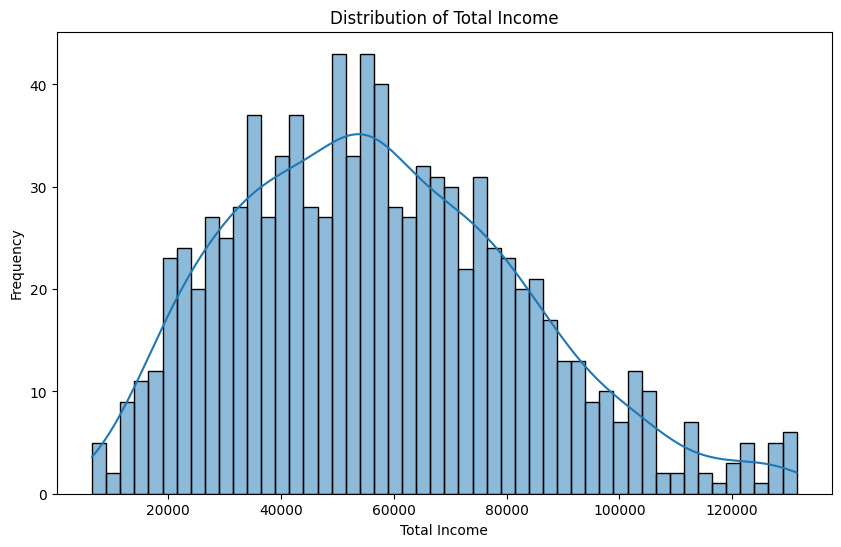

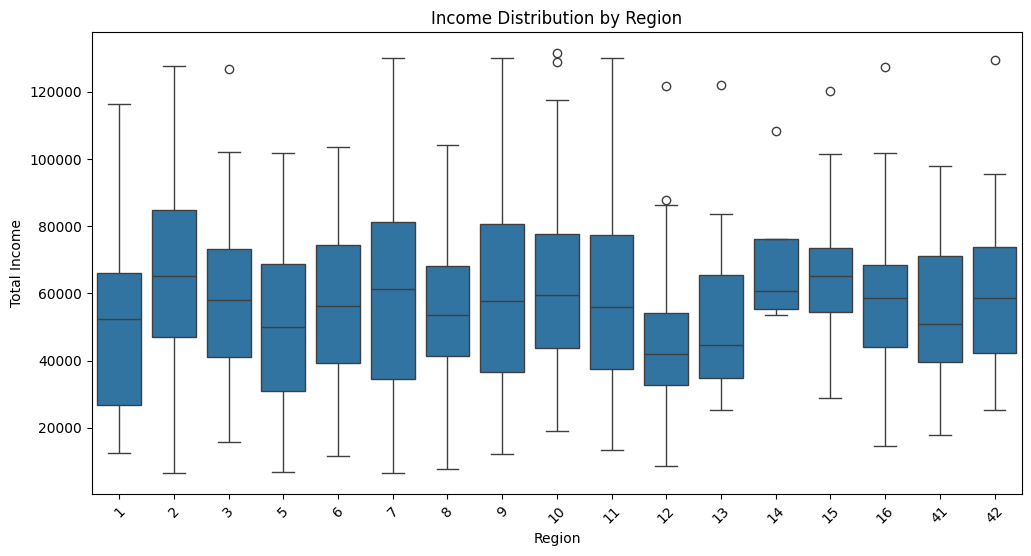

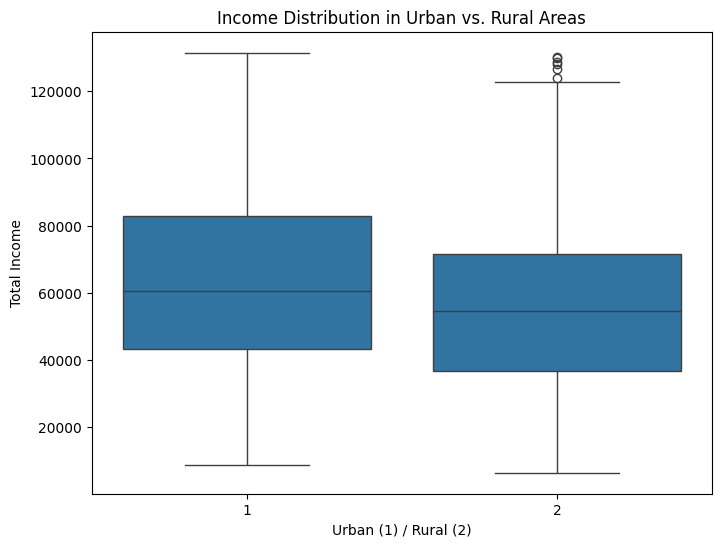

In [35]:
#Total Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(incexp_df["TOINC"], bins=50, kde=True)
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.show()

#Income across regions
plt.figure(figsize=(12,6))
sns.boxplot(x="W_REGN", y="TOINC", data=incexp_df)
plt.title("Income Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()

# Income distribution in Urban vs Rural areas
plt.figure(figsize=(8,6))
sns.boxplot(x="URB", y="TOINC", data=incexp_df)
plt.title("Income Distribution in Urban vs. Rural Areas")
plt.xlabel("Urban (1) / Rural (2)")
plt.ylabel("Total Income")
plt.show()


From the Total Income Distribution, we can see that there is an outlier after the normal distribution curve. The value of 500,000 for the Total Income has the most highest frequency, reaching at 3,000.

## Investigating Correlation between Features
In this section, we will investigate which features have a high correlation with each other. This is to determine which features should be used or removed depending on the data analysis we want to apply.

Here we test the correlation of the features `WAGES`, `AGRI_SAL`, `CASH_ABROAD`.

In [36]:
correlation_test = incexp_df[['WAGES','AGRI_SAL', 'CASH_ABROAD']]
correlation_test.corr()

,WAGES,AGRI_SAL,CASH_ABROAD
WAGES,1.000000,0.334325,NaN
AGRI_SAL,0.334325,1.000000,NaN
CASH_ABROAD,NaN,NaN,NaN


Here, we can see that the correlation value between `WAGES` and `AGRI_SAL` is 0.010084, which is very close to 0, which means there's no significant correlation between these two features.

Same goes for `CASH_ABROAD` and `AGRI_SAL`, which results to a negative value closer to 0.

In [37]:
print(incexp_df['HHTYPE'])

0      2
1      1
2      1
3      1
4      1
      ..
943    1
944    1
945    1
946    2
947    1
Name: HHTYPE, Length: 948, dtype: int64


In [38]:
correlation_test = incexp_df[['EAINC','TOINC', 'CASH_DOMESTIC', 'CASH_ABROAD', 'PCINC']]
correlation_test.corr()

,EAINC,TOINC,CASH_DOMESTIC,CASH_ABROAD,PCINC
EAINC,1.000000,-0.119824,0.047018,NaN,-0.159205
TOINC,-0.119824,1.000000,-0.004280,NaN,0.124421
CASH_DOMESTIC,0.047018,-0.004280,1.000000,NaN,-0.032241
CASH_ABROAD,NaN,NaN,NaN,NaN,NaN
PCINC,-0.159205,0.124421,-0.032241,NaN,1.000000


In [39]:
correlation_test = incexp_df[['WAGES','PCINC']]
correlation_test.corr()

,WAGES,PCINC
WAGES,1.00000,0.12998
PCINC,0.12998,1.00000


In [40]:
correlation_test = incexp_df[['T_RENTVAL','T_ACTRENT', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT']]
correlation_test.corr()

,T_RENTVAL,T_ACTRENT,T_IMPUTED_RENT,T_BIMPUTED_RENT
T_RENTVAL,1.000000,0.164776,0.955173,-0.032474
T_ACTRENT,0.164776,1.000000,-0.132108,-0.005633
T_IMPUTED_RENT,0.955173,-0.132108,1.000000,-0.069608
T_BIMPUTED_RENT,-0.032474,-0.005633,-0.069608,1.000000


# Improving Model Performance

Linear Regression for Predicting Rent Value

In [41]:
rent_features = ['WAGES']
target = "PCINC"
rent_df = incexp_df[rent_features + [target]].dropna()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    rent_df[rent_features], rent_df[target], test_size=0.2, random_state=42
)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

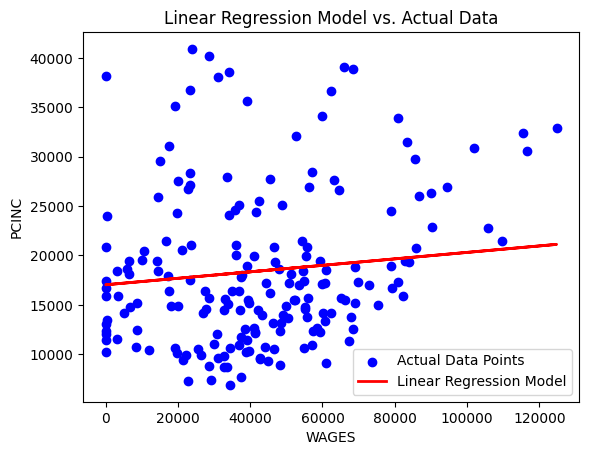

In [46]:
# prompt: Can you plot the  model and the data points

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Model')
plt.xlabel(rent_features[0]) # Assuming only one feature for simplicity
plt.ylabel(target)
plt.title('Linear Regression Model vs. Actual Data')
plt.legend()
plt.show()


In [47]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 58889713.51279871
R² Score: 0.03715441681981324


# Error Analysis

# Model Performance Summary

# Insights and Conclusions

# References

AI Tools were utilized for this work, namely ChatGPT and Deepseek.